<a href="https://colab.research.google.com/github/daredevil0905/machine-learning-notebooks/blob/main/hands-on-ml-examples/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
This notebook is my copy of executing the examples in the Chapter 6: Decision Trees of **Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow**

In [14]:
%pip install -U scikit-learn graphviz

## Training and Visualizing a Decision Tree

### Import necessary modules

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz # To build a .dot file of the decision tree being formed
from graphviz import Source # To visualize the .dot file in png format

### Load dataset

In [8]:
iris_data = load_iris(as_frame=True) # Load the dataset as a Pandas dataframe
X_iris = iris_data.data[["petal length (cm)", "petal width (cm)"]].values # Create a dataset with values of only these two features
y_iris = iris_data.target

### Build the model

In [11]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) # Build a decision tree classifier with maximum depth of the tree to be two
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Visualize the tree

In [13]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris_data.target_names,
    rounded=True,
    filled=True,
    impurity=True
)

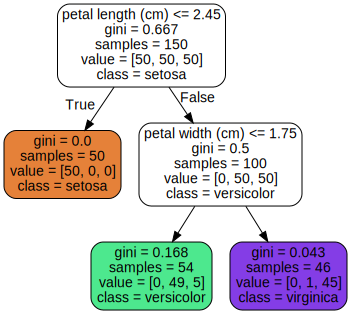

In [16]:
Source.from_file("iris_tree.dot")

### Predict an instance

In [17]:
tree_clf.predict_proba([[5, 1.5]]).round(3) # Predict probabilities of the instance belonging to each class where the instance has petal length 5cm and petal width 1.5cm

array([[0.   , 0.907, 0.093]])

In [18]:
tree_clf.predict([[5, 1.5]]) # predict the class of the same instance => [0: setosa, 1: versicolor, 2: virginica]

array([1])

## Regularization Hyperparameters example

### Import necessary modules

In [24]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

### Load and visualize dataset

In [21]:
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

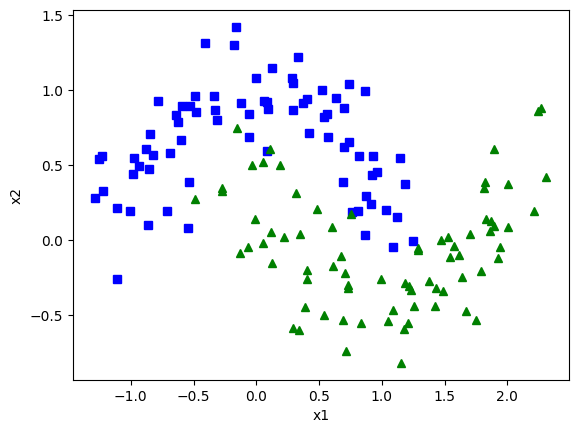

In [22]:
# When the label y is 0, the class is represented with a blue square.
# When the label y is 1, the class is represented with a green triangle.
plt.plot(X_moons[:, 0][y_moons==0], X_moons[:, 1][y_moons==0], "bs")
plt.plot(X_moons[:, 0][y_moons==1], X_moons[:, 1][y_moons==1], "g^")

# X contains two features, x1 and x2
plt.xlabel(r"x1")
plt.ylabel(r"x2")

# Displaying the plot.
plt.show()

### Build the models

In [23]:
tree_clf1 = DecisionTreeClassifier(random_state=42) # Unregulated decision tree
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42) # Regularized decision tree with min_samples_leaf (minimum number of samples a node must have to be classified as a leaf) hyperparameter

tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

### Visualize the decision boundaries

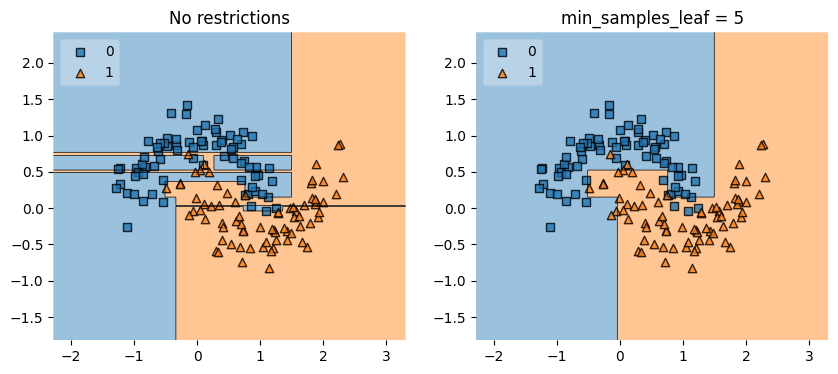

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
plt.sca(axes[0])
plot_decision_regions(X_moons, y_moons, clf=tree_clf1, legend=2)
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_regions(X_moons, y_moons, clf=tree_clf2, legend=2)
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

### Prediction scores on a new test dataset

In [33]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=42)

print(f"tree_clf1 (unregulated tree) score: {tree_clf1.score(X_moons_test, y_moons_test)}")
print(f"tree_clf2 (min_samples_leaf=5) score: {tree_clf2.score(X_moons_test, y_moons_test)}")

tree_clf1 (unregulated tree) score: 0.901
tree_clf2 (min_samples_leaf=5) score: 0.918


## Regression using Decision Trees

### Import necessary modules

In [34]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

### Load and visualize the dataset

In [40]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5 # generate a random 200 sample dataset
y_quad = X_quad ** 2 + 0.025 * np.random.rand(200, 1) # generate a quadratic target set based on X_quad with some random noise

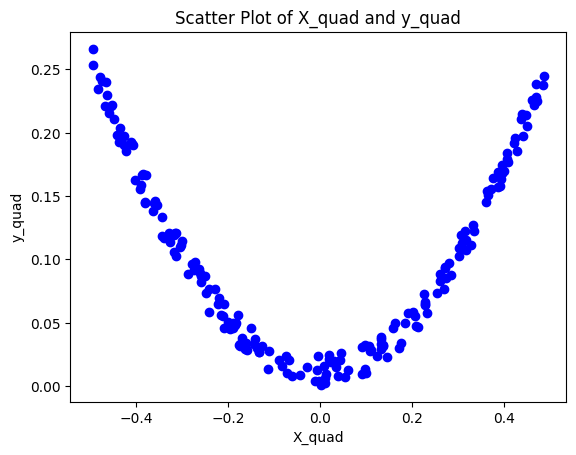

In [41]:
# Flatten them to 1D arrays
X = X_quad.flatten()
y = y_quad.flatten()

# Scatter plot
plt.scatter(X, y, marker='o', color='blue')

# Add labels and title
plt.xlabel('X_quad')
plt.ylabel('y_quad')
plt.title('Scatter Plot of X_quad and y_quad')

# Show the plot
plt.show()

### Build the model

In [46]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

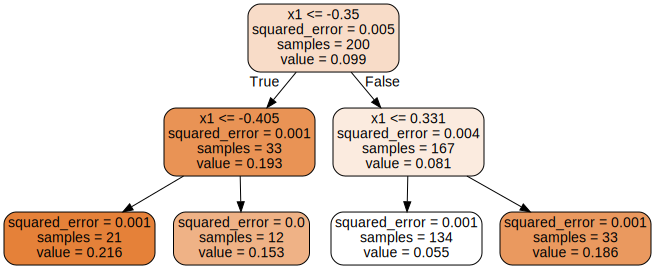

In [47]:
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

## Sensitivity to Axis orientation

### Import necessary modules

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

### Load the dataset

In [52]:
pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris) # iris dataset used in first example

### Build the model

In [54]:
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Visualize the tree and decision boundaries

<Axes: >

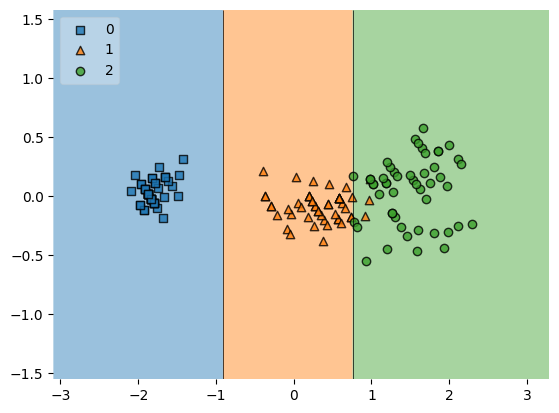

In [57]:
plot_decision_regions(X_iris_rotated, y_iris.values, clf=tree_clf_pca, legend=2)